# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import API key

from Config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#Base URL and Units conversion
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
url_query = f"{url}appid={api_key}&units={units}&q="


city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# Setting Variable count for loop
item = 1
batch = 1


print("Beginning Data Retrieval")
print("**************************")

for city in cities:
    
    query_url = url_query + city
    
    
    data = requests.get(query_url).json()
    
    try:
        print(f"Processing Data For {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        

        item += 1
        

        if item > 50:
 
            batch += 1
            
     
            item = 1
            
         
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping to next on the list")


#Completion statement        
print("*****************************")
print("Data Retrieval Complete!!!")
print("*****************************")

Beginning Data Retrieval
**************************
Processing Data For palabuhanratu
City 'palabuhanratu' not found. Skipping to next on the list
Processing Data For nikolskoye
Processing Data For ushuaia
Processing Data For mys shmidta
City 'mys shmidta' not found. Skipping to next on the list
Processing Data For tasiilaq
Processing Data For clinton
Processing Data For coahuayana
Processing Data For tariba
Processing Data For punta arenas
Processing Data For busselton
Processing Data For kruisfontein
Processing Data For yellowknife
Processing Data For goure
Processing Data For taoudenni
Processing Data For hilo
Processing Data For nabire
Processing Data For shellbrook
Processing Data For carnarvon
Processing Data For illoqqortoormiut
City 'illoqqortoormiut' not found. Skipping to next on the list
Processing Data For meiganga
Processing Data For port elizabeth
Processing Data For sentyabrskiy
City 'sentyabrskiy' not found. Skipping to next on the list
Processing Data For cape town
Pro

Processing Data For esna
Processing Data For plettenberg bay
Processing Data For yauya
Processing Data For bima
Processing Data For bengkulu
Processing Data For hay river
Processing Data For the valley
Processing Data For kollumerland
City 'kollumerland' not found. Skipping to next on the list
Processing Data For popondetta
Processing Data For yar-sale
Processing Data For amanganj
Processing Data For suure-jaani
Processing Data For edd
Processing Data For menongue
Processing Data For madison heights
Processing Data For gisborne
Processing Data For babanusah
City 'babanusah' not found. Skipping to next on the list
Processing Data For mount isa
Processing Data For umm lajj
Processing Data For otane
Processing Data For sinkat
City 'sinkat' not found. Skipping to next on the list
Processing Data For iqaluit
Processing Data For souillac
Processing Data For miraflores
Processing Data For kommunar
Processing Data For kamaishi
Processing Data For north bend
Processing Data For saint-pierre
Pro

Processing Data For kudahuvadhoo
Processing Data For tateyama
Processing Data For la libertad
Processing Data For mazatlan
Processing Data For kabo
Processing Data For san ramon de la nueva oran
Processing Data For gawler
Processing Data For marsh harbour
Processing Data For alta floresta
Processing Data For sao filipe
Processing Data For douentza
Processing Data For primore
City 'primore' not found. Skipping to next on the list
Processing Data For krasnoarmeysk
Processing Data For mantua
Processing Data For petaluma
Processing Data For uva
Processing Data For teguldet
Processing Data For phangnga
Processing Data For salinas
Processing Data For berlevag
Processing Data For flinders
Processing Data For aykhal
Processing Data For lima
Processing Data For roros
Processing Data For lashio
Processing Data For roquetas de mar
Processing Data For bowen
Processing Data For sanchursk
Processing Data For meulaboh
Processing Data For tomatlan
Processing Data For sarkand
Processing Data For colleg

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Assemble data frame
cities_Weather_df = pd.DataFrame({"City": city_name,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                "Country": city_country,
                                "Date": date,                
                                })

# Convert unix timestamp
cities_Weather_df["Date"] = pd.to_datetime(cities_Weather_df["Date"], unit = "s")

#Display dataframe
cities_Weather_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Nikolskoye,59.7035,30.7861,62.49,84,42,3.29,RU,2022-08-03 23:12:05
1,Ushuaia,-54.8000,-68.3000,37.06,87,40,3.44,AR,2022-08-03 23:11:36
2,Tasiilaq,65.6145,-37.6368,33.96,71,79,3.15,GL,2022-08-03 23:12:48
3,Charter Township of Clinton,42.5870,-82.9199,75.22,97,100,10.36,US,2022-08-03 23:16:29
4,Coahuayana Viejo,18.7333,-103.6833,88.52,63,97,5.88,MX,2022-08-03 23:19:56


In [6]:
cities_Weather_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,20.231726,19.195214,69.791632,73.503509,52.505263,7.696947
std,33.011536,90.091284,13.279695,18.789393,38.831855,5.545395
min,-54.800000,-179.166700,33.960000,1.000000,0.000000,0.000000
25%,-7.334050,-60.208275,59.045000,64.000000,12.000000,3.670000
50%,22.262450,23.227100,71.845000,78.000000,53.500000,6.330000
75%,47.161275,97.008325,79.770000,87.000000,95.750000,10.360000
max,78.218600,179.316700,107.650000,100.000000,100.000000,34.270000


In [7]:
#Save the dataframe to .csv file
cities_Weather_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Check if there are any cities with >100% humidity
Total_Data_Describe = cities_Weather_df["Humidity (%)"].describe(include = "all")
Total_Data_Describe

count    570.000000
mean      73.503509
std       18.789393
min        1.000000
25%       64.000000
50%       78.000000
75%       87.000000
max      100.000000
Name: Humidity (%), dtype: float64

In [9]:
print("As per our statics above, there are no cities with humidity values over 100%.")
print("We will skip and continue to use our original dataframe for plotting.") 

As per our statics above, there are no cities with humidity values over 100%.
We will skip and continue to use our original dataframe for plotting.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
#extract relevant fields from the data frame for plotting
latitudes =    cities_Weather_df["Lat"]
temperatures = cities_Weather_df["Max Temp (F)"]
humidity = cities_Weather_df["Humidity (%)"]
cloudiness = cities_Weather_df["Cloudiness (%)"]
windspeed = cities_Weather_df["Wind Speed (mph)"]

## Latitude vs. Temperature Plot

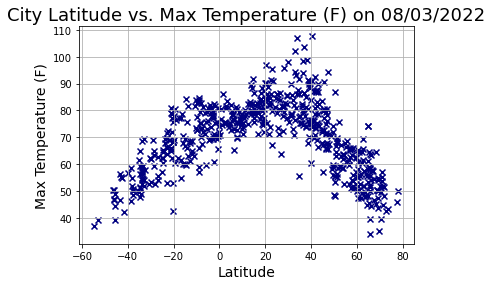

In [11]:
plt.scatter(latitudes, temperatures, marker="x", facecolors="navy")


plt.title("City Latitude vs. Max Temperature (F) on 08/03/2022", fontsize=18)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid()

#Display and save the plot
plt.savefig("Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

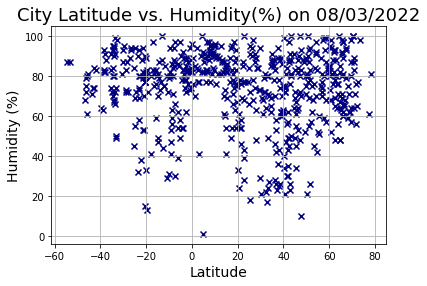

In [12]:
plt.scatter(latitudes, humidity, marker="x", facecolors="navy")


plt.title("City Latitude vs. Humidity(%) on 08/03/2022", fontsize=18)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid()

#Display and save the plot
plt.savefig("Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

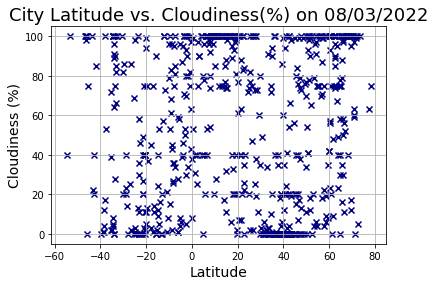

In [13]:
plt.scatter(latitudes, cloudiness, marker="x", facecolors="navy")


plt.title("City Latitude vs. Cloudiness(%) on 08/03/2022", fontsize=18)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid()

#Display and save the plot
plt.savefig("Images/latitude-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

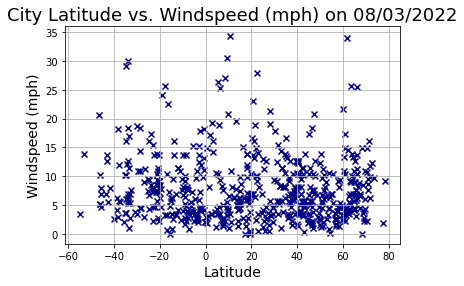

In [14]:
plt.scatter(latitudes, windspeed, marker="x", facecolors="navy")


plt.title("City Latitude vs. Windspeed (mph) on 08/03/2022", fontsize=18)
plt.ylabel("Windspeed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid()

#Display and save the plot
plt.savefig("Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    cc=str(round(r_value**2,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values,marker="x",color="midnightblue")
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=18, color="black")
   
    plt.title(title, wrap=True)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

In [16]:
northern_hemi_df = cities_Weather_df.loc[(cities_Weather_df["Lat"] >= 0)]
southern_hemi_df = cities_Weather_df[(cities_Weather_df["Lat"] < 0)]

In [17]:
#Define columns to make it easier with referencing code below
northern_hemi_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp (F)', 'Humidity (%)', 'Cloudiness (%)',
       'Wind Speed (mph)', 'Country', 'Date'],
      dtype='object')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

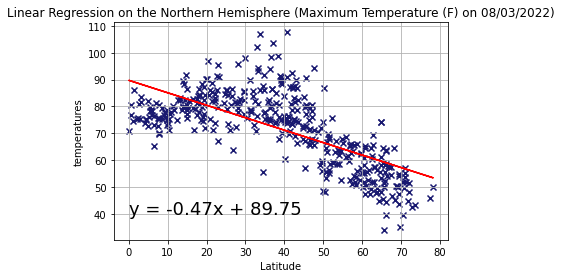

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp (F)"]
plt.grid()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere (Maximum Temperature (F) on 08/03/2022)', 'temperatures',(0,40))

plt.savefig("Images/Northern Hemisphere-Latitude-vs-Temperature_LN.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

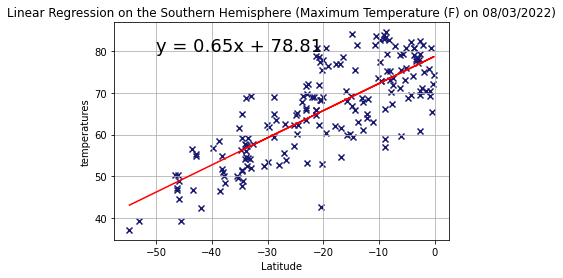

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp (F)"]
plt.grid()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere (Maximum Temperature (F) on 08/03/2022)', 'temperatures',(-50,80))
plt.savefig("Images/Southern Hemisphere-Latitude-vs-Temperature_LN.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

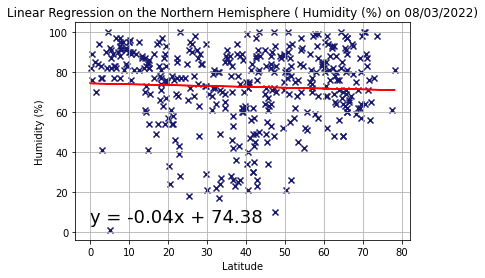

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity (%)"]
plt.grid()

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere ( Humidity (%) on 08/03/2022)', 'Humidity (%)',(0,5))
plt.savefig("Images/Northern Hemisphere-Latitude-vs-Humidity_LN.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

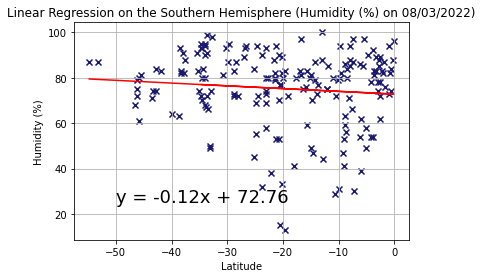

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity (%)"]
plt.grid()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere (Humidity (%) on 08/03/2022)', 'Humidity (%)',(-50,25))
plt.savefig("Images/Southern Hemisphere-Latitude-vs-Humidity_LN.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

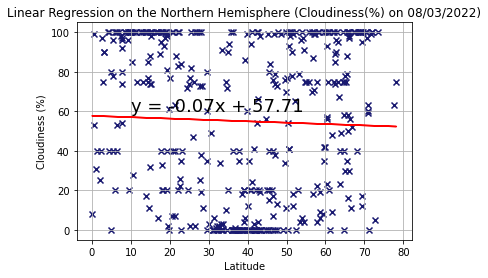

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness (%)"]
plt.grid()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere (Cloudiness(%) on 08/03/2022)', 'Cloudiness (%)',(10,60))
plt.savefig("Images/Northern Hemisphere-Latitude-vs-Cloudiness_LN.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

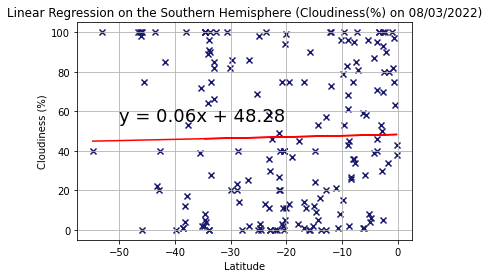

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness (%)"]
plt.grid()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere (Cloudiness(%) on 08/03/2022)', 'Cloudiness (%)',(-50,55))
plt.savefig("Images/Southern Hemisphere-Latitude-vs-Cloudiness_LN.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

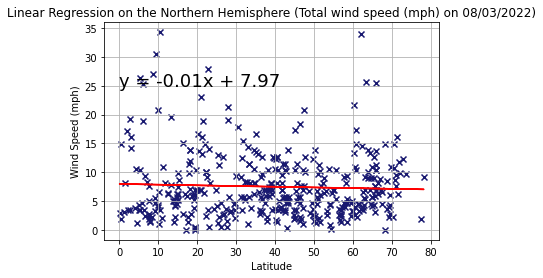

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed (mph)"]
plt.grid()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere (Total wind speed (mph) on 08/03/2022)', 'Wind Speed (mph)',(0,25))
plt.savefig("Images/Northern Hemisphere-Latitude-vs-Windspeed_LN.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

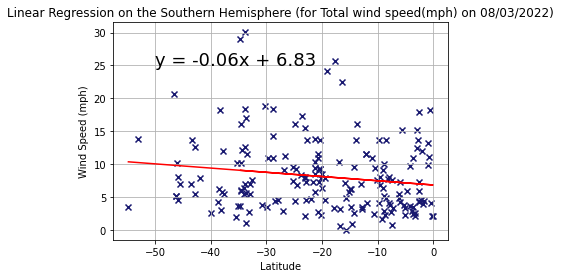

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed (mph)"]
plt.grid()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere (for Total wind speed(mph) on 08/03/2022)', 'Wind Speed (mph)',(-50,25))
plt.savefig("Images/Southern Hemisphere-Latitude-vs-Windspeed_LN.png")